## CNDC EDA

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import re

In [33]:
df = pd.read_csv('CNDC.csv')

In [34]:
df.head()

,Unnamed: 0,Nombre dictamen,Nro dictamen,Nro resolucion,Fecha,Tipos
0,0,Recurso de hecho deducido por el Estado Nacio...,NaN,NaN,NaN,NaN
1,1,"ANGEL JORGE ANTONIO CALCATERRA, LATINA DE INFR...",1108.0,30.0,2015-03-03,Concentraciones
2,2,L3N S.A. Y SANCOR COOPERATIVAS UNIDAS LIMITADA...,100502933.0,22.0,2020-01-30,Concentraciones
3,3,"FRAS-LE S.A., MARCELO PASSAGLIA PARACCHINI, BE...",106433714.0,21.0,2020-01-30,Concentraciones
4,4,GRISU S.A. Y OTRO C/ ESTADO NACIONAL,NaN,NaN,NaN,NaN


In [35]:
df.describe()

,Unnamed: 0,Nro dictamen,Nro resolucion
count,2646.00000,2.486000e+03,2.488000e+03
mean,1322.50000,3.712832e+06,4.853304e+04
std,763.97873,1.338931e+07,2.078712e+06
min,0.00000,1.000000e+00,1.000000e+00
25%,661.25000,1.530000e+02,5.300000e+01
50%,1322.50000,4.425000e+02,1.350000e+02
75%,1983.75000,1.011750e+03,3.050000e+02
max,2645.00000,1.064337e+08,1.021001e+08


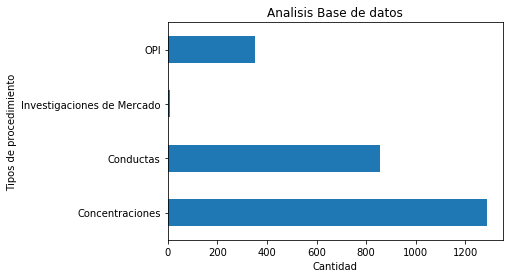

In [36]:
df.groupby(['Tipos']).size().plot(kind='barh')
plt.ylabel('Tipos de procedimiento')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.show()

In [37]:
# Solo trabajo con Conductas 
df_conducta = df[df["Tipos"] == "Conductas"].copy()
df_conducta.reset_index(drop=True, inplace=True)
df_conducta.shape

(855, 6)

In [38]:
df_conducta ['Fecha']=pd.to_datetime(df_conducta['Fecha']) 

In [39]:
df_conducta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       855 non-null    int64         
 1   Nombre dictamen  855 non-null    object        
 2   Nro dictamen     839 non-null    float64       
 3   Nro resolucion   836 non-null    float64       
 4   Fecha            839 non-null    datetime64[ns]
 5   Tipos            855 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 40.2+ KB


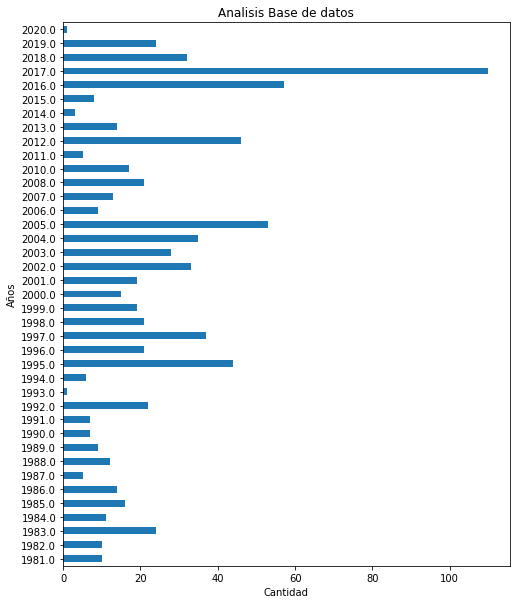

In [40]:
plt.figure(figsize=(8,10))
df_conducta.groupby(df_conducta.Fecha.dt.year).size().plot(kind='barh')
plt.ylabel('Años')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.show()

In [41]:
df = pd.read_csv('CNDC_consolidado.csv')

In [42]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Nombre,Nro. de Dictamen,Nro. de Resolucion,Fecha,Tipo de Documento,Industria,Descripcion,Tipo de Conducta/ Concentracion 1,Tipo de Conducta/Concentracion 2
0,0,0,Recurso de hecho deducido por el Estado Nacio...,NaN,NaN,NaN,NaN,,FORD ARGENTINA S A Y OTRO S APEL pdf,,
1,1,1,"ANGEL JORGE ANTONIO CALCATERRA, LATINA DE INFR...",1108.0,30.0,2015-03-03,Concentraciones,,CONCENTRACION CONC CONC EXP SO ...,,
2,2,2,L3N S.A. Y SANCOR COOPERATIVAS UNIDAS LIMITADA...,100502933.0,22.0,2020-01-30,Concentraciones,,CONCENTRACIÓN CONC CONC EX ...,,
3,3,3,"FRAS-LE S.A., MARCELO PASSAGLIA PARACCHINI, BE...",106433714.0,21.0,2020-01-30,Concentraciones,COMERCIO AL POR MAYOR/MENOR; REPARACIÓN VEHÍCU...,CONCENTRACION CONC CONC EX ...,,
4,4,4,GRISU S.A. Y OTRO C/ ESTADO NACIONAL,NaN,NaN,NaN,NaN,,Grisu s a y otro c estado Nacional pdf,,


In [43]:
df = pd.read_csv('CNDC_consolidado.csv', parse_dates=[5])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         2646 non-null   int64         
 1   Unnamed: 0.1                       2646 non-null   int64         
 2   Nombre                             2646 non-null   object        
 3   Nro. de Dictamen                   2486 non-null   float64       
 4   Nro. de Resolucion                 2488 non-null   float64       
 5   Fecha                              2491 non-null   datetime64[ns]
 6   Tipo de Documento                  2500 non-null   object        
 7   Industria                          2613 non-null   object        
 8   Descripcion                        2646 non-null   object        
 9   Tipo de Conducta/ Concentracion 1  2646 non-null   object        
 10  Tipo de Conducta/Concentracion 2   2

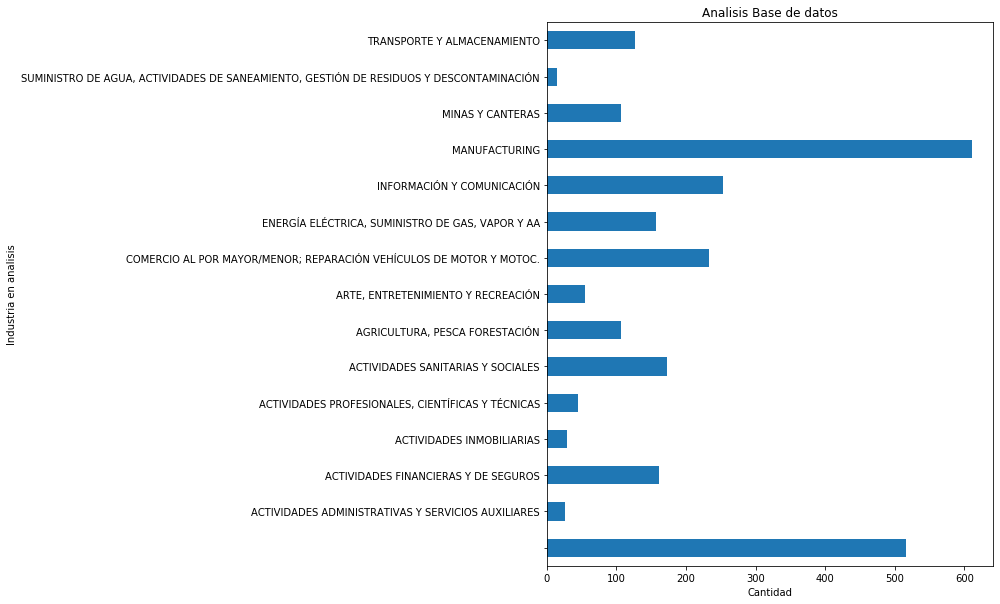

In [45]:
plt.figure(figsize=(8,10))
df.groupby(['Industria']).size().plot(kind='barh')
plt.ylabel('Industria en analisis')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.show()
#La que no tiene tag es 'N/A'

In [46]:
df_conducta = df[df["Tipo de Documento"] == "Conductas"].copy()
df_conducta.reset_index(drop=True, inplace=True)
df_conducta.shape

(855, 11)

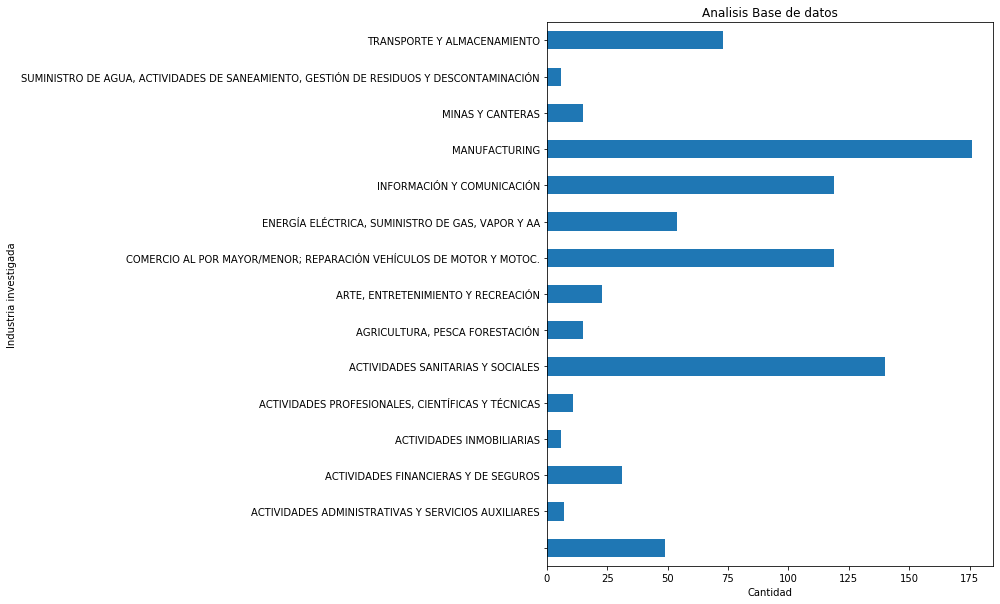

In [47]:
plt.figure(figsize=(8,10))
df_conducta.groupby(['Industria']).size().plot(kind='barh')
plt.ylabel('Industria investigada')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.show()

In [48]:
##Informacion y comunicacion + Comercio al por mayor y menor no son areas con taantos jugadores y tuvieron una conflictividad muy grande. Asi que vale la pena estudiarlo. 

In [49]:
categorias=df_conducta.Industria.unique()
print ('Las categorias que existen en el campo Industria son'+str(categorias))

Las categorias que existen en el campo Industria son[' ' 'ACTIVIDADES SANITARIAS Y SOCIALES'
 'ARTE, ENTRETENIMIENTO Y RECREACIÓN' nan 'INFORMACIÓN Y COMUNICACIÓN'
 'MINAS Y CANTERAS'
 'COMERCIO AL POR MAYOR/MENOR; REPARACIÓN VEHÍCULOS DE MOTOR Y MOTOC.'
 'TRANSPORTE Y ALMACENAMIENTO' 'MANUFACTURING'
 'ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXILIARES'
 'AGRICULTURA, PESCA FORESTACIÓN'
 'ENERGÍA ELÉCTRICA, SUMINISTRO DE GAS, VAPOR Y AA'
 'ACTIVIDADES FINANCIERAS Y DE SEGUROS'
 'SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTIÓN DE RESIDUOS Y DESCONTAMINACIÓN'
 'ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS'
 'ACTIVIDADES INMOBILIARIAS']


In [50]:
mask=(df_conducta.Industria=='MANUFACTURING')| (df_conducta.Industria=='ACTIVIDADES SANITARIAS Y SOCIALES')|(df_conducta.Industria=='COMERCIO AL POR MAYOR/MENOR; REPARACIÓN VEHÍCULOS DE MOTOR Y MOTOC.')|(df_conducta.Industria=='INFORMACIÓN Y COMUNICACIÓN')
df_filtered=df_conducta[mask]

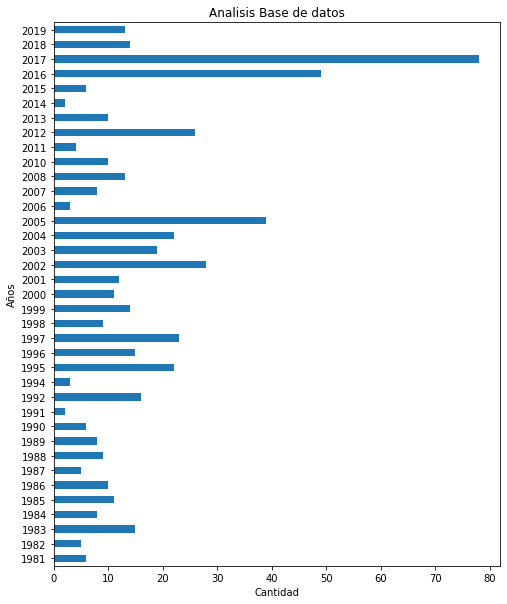

In [51]:
plt.figure(figsize=(8,10))
df_filtered.groupby(df_filtered.Fecha.dt.year).size().plot(kind='barh')
plt.ylabel('Años')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.show()

In [52]:
#2017 y 2016 es un outlier 
## 2012 y 2005 y 2002 parecen ser los anos que mas se movio la CNDC. Ver que dijo Diego Petrecolla sobre la demora. Si es 5 anos en promedio, entonces las de 2005 son las de 2000 /2001. 

In [53]:
df_filtered.index = pd.DatetimeIndex(df_filtered.Fecha)
df_filtered

,Unnamed: 0,Unnamed: 0.1,Nombre,Nro. de Dictamen,Nro. de Resolucion,Fecha,Tipo de Documento,Industria,Descripcion,Tipo de Conducta/ Concentracion 1,Tipo de Conducta/Concentracion 2
Fecha,,,,,,,,,,,
2019-09-19,6,6,CÍRCULO DE BIOQUÍMICOS DE LA PCIA. DE MISIONES...,64324350.0,574.0,2019-09-19,Conductas,ACTIVIDADES SANITARIAS Y SOCIALES,CONDUCTA COND COND EXP S ...,Acuerdos de Precios,Prácticas Facilitadoras de Colusión
2019-09-19,21,21,“COOPERATIVA ELÉCTRICA Y ANEXOS LTADA. C.E.Y.A...,55039695.0,595.0,2019-09-19,Conductas,INFORMACIÓN Y COMUNICACIÓN,CONDUCTA COND COND EXP S ...,Unilateral,
2019-09-19,22,22,IMAGEN ONCATIVO S.A S/ SOLICITUD DE INTERVENCI...,51573539.0,572.0,2019-09-19,Conductas,INFORMACIÓN Y COMUNICACIÓN,COND Nº S IMAGEN ONCATIVO S...,Otras,
2019-08-11,24,24,“CLUB DE CAMPO SAN DIEGO S.A. S/ INFRACCIÓN LE...,49945989.0,738.0,2019-08-11,Conductas,COMERCIO AL POR MAYOR/MENOR; REPARACIÓN VEHÍCU...,CONDUCTA COND C EX A...,,
2019-09-19,66,66,COND1677\tDR. RAFAEL PEREYRA ZORRAQUÍN S/ SOLI...,57520024.0,569.0,2019-09-19,Conductas,MANUFACTURING,COND EX APN DGD MP DR RAF...,Otras,
...,...,...,...,...,...,...,...,...,...,...,...
1981-01-18,2637,2637,Microsules Argentina S.A.\tCooper Argentina Saac,9.0,699.0,1981-01-18,Conductas,MANUFACTURING,Conducta Unanimidad ...,Unilateral,
1981-04-12,2638,2638,ASOCIACIÓN ARGENTINA DE PRODUCTORES DE HUEVOS ...,8.0,633.0,1981-04-12,Conductas,MANUFACTURING,Conducta Unanimidad...,Concertada,
1981-11-24,2640,2640,LA PLATENSE S.A.\tEOLO S.A.\t Conducta 6,6.0,574.0,1981-11-24,Conductas,ACTIVIDADES SANITARIAS Y SOCIALES,Conducta Unanimida...,Otras,Unilateral


In [55]:
df_manufacturing = df_conducta[df["Industria"] == "MANUFACTURING"].copy()
df_manufactuing.reset_index(drop=True, inplace=True)
df_conducta.shape

<ipython-input-55-ef32d1f20890>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_manufacturing = df_conducta[df["Industria"] == "MANUFACTURING"].copy()


(174, 11)

In [56]:
df_sanitarias = df_conducta[df["Industria"] == "ACTIVIDADES SANITARIAS Y SOCIALES"].copy()
df_sanitarias.reset_index(drop=True, inplace=True)
df_sanitarias.shape

<ipython-input-56-49534e8d5051>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sanitarias = df_conducta[df["Industria"] == "ACTIVIDADES SANITARIAS Y SOCIALES"].copy()


(39, 11)

In [57]:
df_automotor = df_conducta[df["Industria"] == "COMERCIO AL POR MAYOR/MENOR; REPARACIÓN VEHÍCULOS DE MOTOR Y MOTOC."].copy()
df_automotor.reset_index(drop=True, inplace=True)
df_automotor.shape

<ipython-input-57-a9eead2af705>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_automotor = df_conducta[df["Industria"] == "COMERCIO AL POR MAYOR/MENOR; REPARACIÓN VEHÍCULOS DE MOTOR Y MOTOC."].copy()


(77, 11)

In [58]:
df_TIC = df_conducta[df["Industria"] == "INFORMACIÓN Y COMUNICACIÓN"].copy()
df_TIC.reset_index(drop=True, inplace=True)
df_TIC.shape

<ipython-input-58-fd048963214a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_TIC = df_conducta[df["Industria"] == "INFORMACIÓN Y COMUNICACIÓN"].copy()


(69, 11)

In [60]:
##import plotly.graph_objects as go
from plotly.subplots import make_subplots

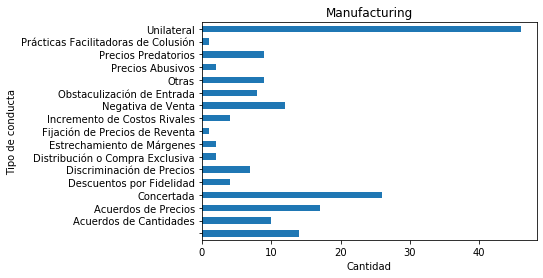

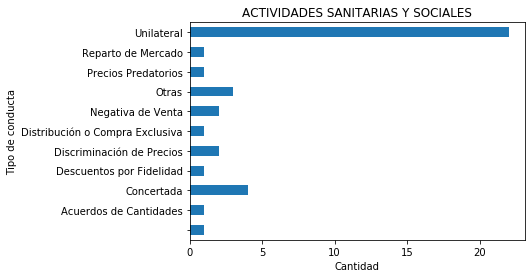

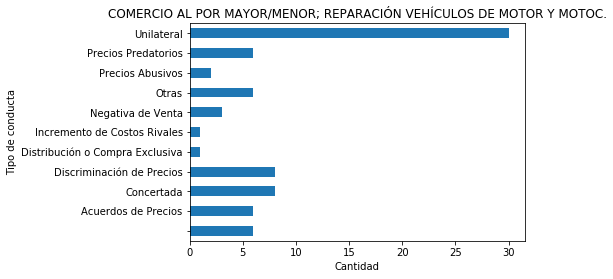

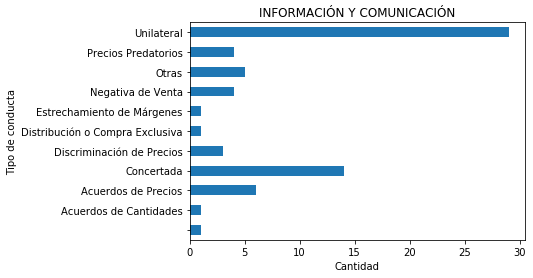

In [71]:
##df_manufacturing
df_manufacturing.groupby(['Tipo de Conducta/ Concentracion 1']).size().plot(kind='barh')
plt.ylabel('Tipo de conducta')
plt.xlabel('Cantidad')
plt.title('Manufacturing')
plt.show()

##df_sanitarias
df_sanitarias.groupby(['Tipo de Conducta/ Concentracion 1']).size().plot(kind='barh')
plt.ylabel('Tipo de conducta')
plt.xlabel('Cantidad')
plt.title('ACTIVIDADES SANITARIAS Y SOCIALES')
plt.show()

##df_automotor
df_automotor.groupby(['Tipo de Conducta/ Concentracion 1']).size(). plot(kind='barh')
plt.ylabel('Tipo de conducta')
plt.xlabel('Cantidad')
plt.title('COMERCIO AL POR MAYOR/MENOR; REPARACIÓN VEHÍCULOS DE MOTOR Y MOTOC.')
plt.show()

##df_TIC
df_TIC.groupby(['Tipo de Conducta/ Concentracion 1']).size().plot(kind='barh')
plt.ylabel('Tipo de conducta')
plt.xlabel('Cantidad')
plt.title('INFORMACIÓN Y COMUNICACIÓN')
plt.show()

In [ ]:
# Manufacturing: Unilateral y concertada. 
# Sanitarias: Unilateral
# Comercio al por mayor, reparacion vehiculos> unilateral, discriminacion de precios, concertada.
# Informacion y comunicacion> Unilateral y Concertaa.

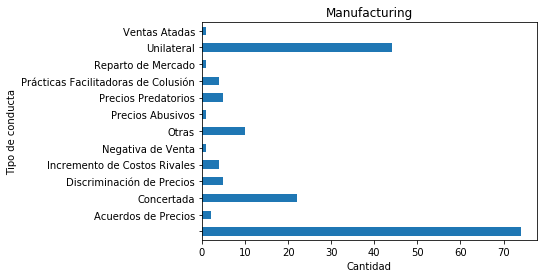

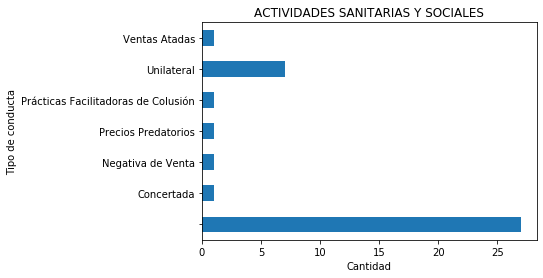

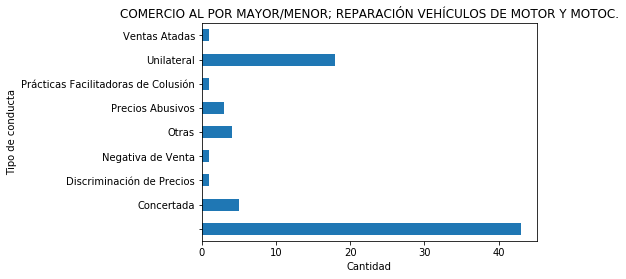

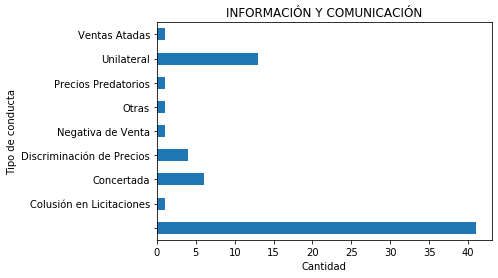

In [77]:
## lO PLOTEO PERO TIENE MUCHOS VALORES FALTANTES. NO SIRVE PARA ENCONTRAR TENDENCIA. Ver is null().sum() para ver que proporcion de vacios tiene. 
##df_manufacturing
df_manufacturing.groupby(['Tipo de Conducta/Concentracion 2']).size().plot(kind='barh')
plt.ylabel('Tipo de conducta')
plt.xlabel('Cantidad')
plt.title('Manufacturing')
plt.show()

##df_sanitarias
df_sanitarias.groupby(['Tipo de Conducta/Concentracion 2']).size().plot(kind='barh')
plt.ylabel('Tipo de conducta')
plt.xlabel('Cantidad')
plt.title('ACTIVIDADES SANITARIAS Y SOCIALES')
plt.show()

##df_automotor
df_automotor.groupby(['Tipo de Conducta/Concentracion 2']).size(). plot(kind='barh')
plt.ylabel('Tipo de conducta')
plt.xlabel('Cantidad')
plt.title('COMERCIO AL POR MAYOR/MENOR; REPARACIÓN VEHÍCULOS DE MOTOR Y MOTOC.')
plt.show()

##df_TIC
df_TIC.groupby(['Tipo de Conducta/Concentracion 2']).size().plot(kind='barh')
plt.ylabel('Tipo de conducta')
plt.xlabel('Cantidad')
plt.title('INFORMACIÓN Y COMUNICACIÓN')
plt.show()